In [1]:
import pandas as pd
import requests

data = requests.get(
    'https://ravenclaw-services.herokuapp.com/CRUD/admin/lihat-data-pengajuan')
df = pd.DataFrame(data.json())
df.sample(4)

df['Date'] = df['due'].apply(lambda x:x['due_date'])
df['Close'] = df['bsu'].apply(lambda x:x['bsu_fix'])

In [2]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import iplot, init_notebook_mode
import plotly.figure_factory as ff


In [3]:
df.head()

,order_id,username,name,divisi,manajer,kategori,aktivitas,status,due,bsu,mitra,metode_pengadaan,Date,Close
0,DEV-1666103949,hanggoro,Hanggoro Feriawan,DEVOPS,Yuyus Nurkamal,CAPEX,Pengadaan Cloud Service GCP,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-03-25'}","{'bsu_kategori': 'fix', 'bsu_fix': 450000000}",Amazon,Pemilihan Langsung,2021-03-25,4.500000e+08
1,DEV-1666103951,hanggoro,Hanggoro Feriawan,DEVOPS,Tri Widiartono,CAPEX,Pengadaan Cloud Service GCP,COMPLETED,"{'due_quarter': 'Q3', 'due_date': '2021-03-26'}","{'bsu_kategori': 'fix', 'bsu_fix': 236479995.7...",Aplikanusa Lintasarta,Pembelian Langsung,2021-03-26,2.364800e+08
2,DEV-1666103952,hanggoro,Hanggoro Feriawan,DEVOPS,Triyanta,OPEX,Pengadaan Data Lake,ON PROCESS,"{'due_quarter': 'Q3', 'due_date': '2021-03-29'}","{'bsu_kategori': 'fix', 'bsu_fix': 235240005.4...",Samsung Group,Lelang Terbuka,2021-03-29,2.352400e+08
3,DEV-1666103954,hanggoro,Hanggoro Feriawan,DEVOPS,Yuyus Nurkamal,CAPEX,Implementasi Robotics Process Automation(RPA) ...,COMPLETED,"{'due_quarter': 'Q3', 'due_date': '2021-03-30'}","{'bsu_kategori': 'fix', 'bsu_fix': 231850006.1...",Microsoft,Pembelian Langsung,2021-03-30,2.318500e+08
4,DEV-1666103955,hanggoro,Hanggoro Feriawan,DEVOPS,Tri Widiartono,CAPEX,Pengadaan Cloud Service Alibaba,REQUESTED,"{'due_quarter': 'Q3', 'due_date': '2021-03-31'}","{'bsu_kategori': 'fix', 'bsu_fix': 235770004.2...",PT Telkom Indonesia,Pembelian Langsung Terbatas,2021-03-31,2.357700e+08


In [4]:
# aktivitas_random = [
#     'Pengadaan Lisensi Oracle',
#     'Pengadaan Bootcamp Web Development',
#     'Pengadaan Data Lake',
#     'Pengadaan Laptop',
#     'Support Maintanance',
#     'Pengadaan Cloud Service Alibaba',
#     'Pengadaan Cloud Service AWS',
#     'Pengadaan Cloud Service GCP',
#     'Amazon EC2',
#     'Pengadaan IP Transit',
#     'Implementasi Robotics Process Automation(RPA) pada proses rekonsiliasi SGLK',
#     'Implementasi Aplikasi CRM',
#     'Bootcamp MT'
# ] + ['Pengadaan Cloud Service Alibaba'] * 2 + ['Pengadaan Cloud Service AWS'] * 1 + ['Pengadaan Cloud Service GCP'] * 3


In [5]:
# import random
# aktivitas_random_list = [random.choice(aktivitas_random) for _ in range(201)]

In [6]:


# df['aktivitas'] = aktivitas_random_list


In [7]:
# df.drop(columns=['Date','Close'],inplace=True)

In [8]:
# import requests
# from tqdm import tqdm

# for i in tqdm(df.to_dict(orient='records')):
#     requests.post(
#         'https://ravenclaw-services.herokuapp.com/CRUD/client/form-pengajuan', json=i)


##### Wordcloud

In [9]:
filtered_words = df['aktivitas'].to_list()

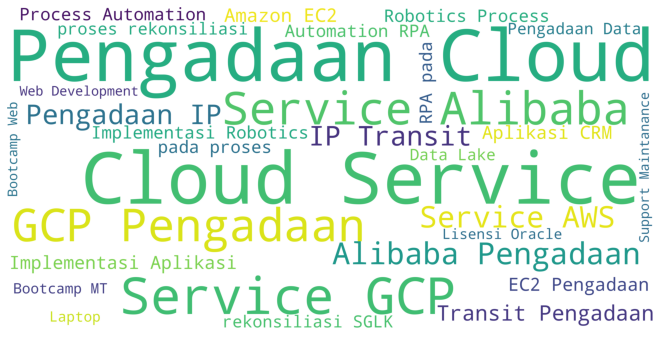

In [10]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


# lower max_font_size, change the maximum number of word and lighten the background:

wordcloud = WordCloud(width=4000, height=2000,
                      background_color='white',
                      min_font_size=10).generate(" ".join(filtered_words))

plt.figure(figsize=(9, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('assets/foo.png')


##### Forecast

In [11]:
data_forecast = pd.read_csv('static_forecast.csv')
data_forecast

,Unnamed: 0,dates_train,train_predictions,y_train
0,0,2021-03-25,2.375792e+08,2.323400e+08
1,1,2021-03-26,2.355250e+08,2.364800e+08
2,2,2021-03-29,2.370081e+08,2.352400e+08
3,3,2021-03-30,2.371796e+08,2.318500e+08
4,4,2021-03-31,2.352162e+08,2.357700e+08
...,...,...,...,...
196,196,2022-01-03,3.286810e+08,3.347500e+08
197,197,2022-01-04,3.277242e+08,3.290100e+08
198,198,2022-01-05,3.250163e+08,3.163800e+08
199,199,2022-01-06,3.177044e+08,3.138800e+08


In [12]:
data_forecast['bulan'] = data_forecast['dates_train'].apply(lambda x: "-".join(x.split('-')[:2]))
data_bulan = data_forecast.groupby(['bulan']).sum().reset_index()

In [13]:
import plotly.graph_objects as go
data_forecast = pd.read_csv('static_forecast.csv')


fig_for = go.Figure()

fig_for.add_trace(
    go.Scatter(
        x=data_bulan['bulan'],
        y=data_bulan['train_predictions'],
        name='Predictions'
    ))

fig_for.add_trace(
    go.Scatter(
        x=data_bulan['bulan'],
        y=data_bulan['y_train'],
        name='Target Data'
    ))

fig_for.update_layout(title='Forecasting')


fig_for.show()


In [14]:
import plotly.graph_objects as go
data_forecast = pd.read_csv('static_forecast.csv')


fig_for = go.Figure()

fig_for.add_trace(
    go.Scatter(
        x=data_forecast['dates_train'],
        y=data_forecast['train_predictions'],
        name='Predictions'
    ))

fig_for.add_trace(
    go.Scatter(
        x=data_forecast['dates_train'],
        y=data_forecast['y_train'],
        name='Target Data'
    ))

fig_for.update_layout(title='Forecasting')


fig_for.show()


In [15]:
penyerapan_anggaran = df.groupby(['divisi']).sum()[
    'Close'].reset_index()
penyerapan_anggaran.sort_values(by='Close')


,divisi,Close
0,AO,1.167733e+10
3,ITSG,1.331038e+10
2,ITAIS,1.460636e+10
1,DEVOPS,1.878709e+10


In [16]:
status_count = df.groupby(['status']).count()[
    'Close'].reset_index()
status_count

,status,Close
0,COMPLETED,23
1,ON PROCESS,65
2,REJECTED,20
3,REQUESTED,93


In [17]:
divisi_agg = df.groupby(['divisi']).count()[
    'order_id'].reset_index()
divisi_agg


,divisi,order_id
0,AO,38
1,DEVOPS,73
2,ITAIS,50
3,ITSG,40


In [18]:
fig_bar_gab = px.histogram(df, x='kategori', color='divisi', barmode="group",
                           title=f"Distribusi Kategori per Divisi")
fig_bar_gab.update_layout(width=600, height=500, bargap=0.2)
fig_bar_gab.show()


In [19]:
fig_bar_stat = px.histogram(df, x='status', color='divisi', barmode="group",
                           title=f"Distribusi Status per Divisi")
fig_bar_stat.update_layout(width=700, height=500, bargap=0.2)
fig_bar_stat.show()


In [20]:
# Use `hole` to create a donut-like pie chart
fig_divisi_top = go.Figure(data=[go.Pie(labels=divisi_agg['divisi'],
                                    values=divisi_agg['order_id'], hole=.5)])
fig_divisi_top.update_layout(width=600, title='#Count Pengajuan Per Divisi')
fig_divisi_top.show()


In [21]:
divisi_agg_sum = df.groupby(['divisi']).sum()[
    'Close'].reset_index()



In [22]:
# Use `hole` to create a donut-like pie chart
fig_divisi_sum = go.Figure(data=[go.Pie(labels=divisi_agg_sum['divisi'],
                                        values=divisi_agg_sum['Close'], hole=.5)])
fig_divisi_sum.update_layout(width=600, title='Jumlah Anggaran Per Divisi')
fig_divisi_sum.show()


In [23]:
metode_pengadaan = df.groupby(['metode_pengadaan']).count()['order_id'].reset_index()


In [24]:
metode_pengadaan


,metode_pengadaan,order_id
0,Lelang Terbuka,102
1,Pembelian Langsung,65
2,Pembelian Langsung Terbatas,11
3,Pemilihan Langsung,1
4,Penunjukkan Langsung,22


In [25]:
from turtle import width
import plotly.graph_objects as go

# Use `hole` to create a donut-like pie chart
fig_metode = go.Figure(data=[go.Pie(labels=metode_pengadaan['metode_pengadaan'],
                values=metode_pengadaan['order_id'], hole=.5)])
fig_metode.update_layout(width=600, title='Persentase Metode Pengadaan')
fig_metode.show()


In [26]:
top_mitra = df.groupby(['mitra']).count()['order_id'].reset_index()
top_mitra = top_mitra.sort_values(by='order_id')[:10]

In [27]:


mitra_hor_bar = px.bar(x=top_mitra['order_id'],
                     y=top_mitra['mitra'], orientation='h',
                     labels={'x': 'Jumlah Pengadaan', 'y': 'Nama Mitra'})

mitra_hor_bar.update_layout(title_text=f"<b>Top Mitra</b>",
                          width=700, height=500, bargap=0.5)
mitra_hor_bar.show()


In [28]:
bottom_topic = df.groupby(['aktivitas']).count()['order_id'].reset_index()
bottom_topic = bottom_topic.sort_values(by='order_id')[:]
bottom_topic


,aktivitas,order_id
4,Pengadaan Bootcamp Web Development,7
12,Support Maintanance,7
1,Bootcamp MT,8
10,Pengadaan Laptop,8
11,Pengadaan Lisensi Oracle,8
8,Pengadaan Data Lake,10
3,Implementasi Robotics Process Automation(RPA) ...,11
2,Implementasi Aplikasi CRM,12
0,Amazon EC2,13
9,Pengadaan IP Transit,20


In [29]:


topic = px.bar(x=top_mitra['order_id'],
                     y=top_mitra['mitra'], orientation='h',
                     labels={'x': 'Jumlah Pengadaan', 'y': 'Nama Mitra'})

topic.update_layout(title_text=f"Top Mitra",
                          width=700, height=500, bargap=0.5)
topic.show()


In [30]:
import plotly.express as px
fig_sunburst = px.sunburst(df, path=['divisi','name','manajer'])

fig_sunburst.update_layout(title_text=f"Sunburst Hierarki Pengajuan",
                    width=600, height=500, bargap=0.5)
fig_sunburst.show()


In [31]:
# df

In [32]:

status_count

,status,Close
0,COMPLETED,23
1,ON PROCESS,65
2,REJECTED,20
3,REQUESTED,93


In [33]:
penyerapan_anggaran


,divisi,Close
0,AO,1.167733e+10
1,DEVOPS,1.878709e+10
2,ITAIS,1.460636e+10
3,ITSG,1.331038e+10


In [34]:
penyerapan_anggaran['Close'][0]

11677330017.089844

In [35]:
image_path = 'assets/foo.png'


In [36]:
# ### navbar

# <div class="navbar bg-primary">
#     <div class="container flex">
#     <h1>Cirrus.</h1>
#     <ul>
#         <li><a href="index.html" class="active">Home</a></li>
#         <li><a href="features.html">Features</a></li>
#         <li><a href="docs.html">Docs</a></li>
#     </ul>
#     </div>
# </div>

In [37]:
import dash_html_components as html
import dash_core_components as dcc
import dash
import plotly.graph_objects as go  # or plotly.express as px
fig = go.Figure()  # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )


app = dash.Dash()



app.layout = html.Div(children=[
    html.Div(children=[
    html.Div(
        children=[html.H1("Status Pengajuan")],
    ),
    html.Div(
        children=[
            html.Div(
            children=[html.H3(f"{status_count['Close'][0]}"), html.P(
                f"{status_count['status'][0]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#5cb85c', 'color': '#fff','font-family':'Verdana','font-size':'30px'}
        ),
            html.Div(
            children=[html.H3(f"{status_count['Close'][1]}"), html.P(
                f"{status_count['status'][1]}")],
                style={
                       'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#0275d8', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ),
        html.Div(
            children=[html.H3(f"{status_count['Close'][2]}"), html.P(
                f"{status_count['status'][2]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#df4759', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ),
            html.Div(
            children=[html.H3(f"{status_count['Close'][3]}"), html.P(
                f"{status_count['status'][3]}")],
            style={
                   'padding': '5px', 'border-radius': '5px', 'margin': '5px', 'width': '400px', 'background-color': '#f0ad4e', 'color': '#fff', 'font-family': 'Verdana', 'font-size': '30px'}
        ) ],
        style = {'display': 'flex' , 'align-items': 'center', 'justify-content': 'center','font-family':'Verdana'}
    ),
    html.Div(
        children=[html.H1("Penyerapan Anggaran")],
    ),
    html.Div(
        children=[
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][0]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][0])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124','font-size':'25px'}),
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][1]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][1])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124', 'font-size': '25px'}),
                        html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][2]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][2])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124','font-size':'25px'}),
            html.Div(children=[
                html.P(penyerapan_anggaran['divisi'][3]),
                html.P('Rp {:,.2f}'.format(penyerapan_anggaran['Close'][3])),
            ], style={'display': 'flex', 'justify-content': 'space-between', 'color': '#212124', 'font-size': '25px'})
            
        ],
        style={'width': 'max', 'border': '2px solid #A9A9A9',
               'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
    ),
    html.Div(
        children=[html.H1("Predictive Analytics")],
    ),
    html.Div(children=[
        html.Div(children=[
            html.P('WordCloud',style={'margin-left':'10px'}),
            html.Img(src=image_path)
        ], style={'width': '800px', 'height':'500px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_divisi_top)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_for)
        ], style={'width': 'max', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ]),

    html.Div(
        children=[html.H1("Charts")],
    ),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_sunburst)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_divisi_sum)
            # dcc.Graph(figure=fig_metode)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_bar_stat)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=fig_bar_gab)
            # dcc.Graph(figure=fig_metode)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            dcc.Graph(figure=fig_metode)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
        html.Div(children=[
            dcc.Graph(figure=mitra_hor_bar)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px','margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
    html.Div(children=[
        html.Div(children=[
            # dcc.Graph(figure=mitra_hor_bar)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
        html.Div(children=[
            # dcc.Graph(figure=fig_divisi_sum)
        ], style={'width': '800px', 'border': '2px solid #A9A9A9', 'padding': '10px', 'border-radius': '5px', 'margin': '10px'}
        ),
    ], style={'display': 'flex', 'justify-content': 'center', 'margin': '10px'}),
],
style={'max-width': '1400px', 'margin': '0 auto', 'overflow': 'auto', 'padding': '0 40px', 'font-family':'Verdana'})],style={'box-sizing':'border-box','padding':"0px",'margin':"0px"})

# Turn off reloader if inside Jupyter
app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


C:\Users\hafid\AppData\Local\Temp/ipykernel_13484/1979279550.py:1: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

C:\Users\hafid\AppData\Local\Temp/ipykernel_13484/1979279550.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [19/Oct/2022 10:58:29] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2022 10:58:29] "GET /assets/stylesheet.css?m=1666068939.819808 HTTP/1.1" 304 -
127.0.0.1 - - [19/Oct/2022 10:58:30] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2022 10:58:30] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2022 10:58:30] "GET /_favicon.ico?v=2.6.2 HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2022 10:58:30] "GET /assets/foo.png HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2022 10:58:30] "GET /_dash-compo